## EDA
#### En esta sección del trabajo exploraremos algunas estadísticas indispensables para el conocimiento de la problemática que estamos tratando. Hemos decidido hacer la limpieza de nulos, faltantes y duplicados en el ETL, no sin antes haberlos identificado en el notebook "1 Análisis inicial", esto con el objetivo de enfocarnos en esta sección única y exclusivamente de las estadísticas y relaciones multivariables del tema.

In [34]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [35]:
df_accidentes = pd.read_csv("Data/df_accidentes.csv")
df_accidentes

,Unnamed: 0,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2,2016-0003,1,2016-01-03,07:00:00,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,3,2016-0004,1,2016-01-10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,No identificado,CONDUCTOR,MASCULINO,18,2016-01-10 00:00:00
4,4,2016-0005,1,2016-01-21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,712,2021-0093,1,2021-12-13,17:10:00,AV. RIESTRA Y MOM,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18
711,713,2021-0094,1,2021-12-20,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20
712,714,2021-0095,1,2021-12-30,00:43:00,AV. GAONA Y TERRADA,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02
713,715,2021-0096,1,2021-12-15,10:30:00,AV. EVA PERON 4071,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20


In [36]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           715 non-null    int64 
 1   ID                   715 non-null    object
 2   N_VICTIMAS           715 non-null    int64 
 3   FECHA                715 non-null    object
 4   HORA                 715 non-null    object
 5   LUGAR_DEL_HECHO      715 non-null    object
 6   TIPO_DE_CALLE        715 non-null    object
 7   COMUNA               715 non-null    int64 
 8   pos x                715 non-null    object
 9   pos y                715 non-null    object
 10  PARTICIPANTES        715 non-null    object
 11  VICTIMA_x            715 non-null    object
 12  ACUSADO              715 non-null    object
 13  ROL                  715 non-null    object
 14  SEXO                 715 non-null    object
 15  EDAD                 715 non-null    int64 
 16  FECHA_FA

## Cantidad de víctimas por accidente.

In [37]:
print(df_accidentes["N_VICTIMAS"].unique())

[1 2 3]


##### Vemos que la mayor cifra de víctimas por accidente es 3, podemos graficar ahora cómo se distribuyen las cifras de víctimas por accidente entre el total de accidentes acaecidos.

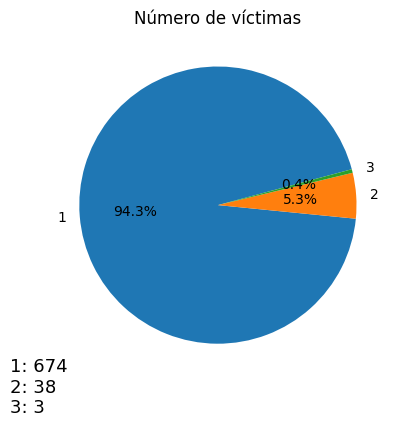

In [38]:
valores = df_accidentes["N_VICTIMAS"].value_counts()
porcentajes = valores / len(df_accidentes) * 100

plt.figure(figsize=(4.5, 4.5))
grafico, texto, autotexto = plt.pie(porcentajes, labels=valores.index, autopct="%.1f%%", startangle=15)

conteo_por_valor = [f"{valores.index[i]}: {valores.values[i]}" for i in range(len(valores))]
plt.text(-1.5, -1.5, '\n'.join(conteo_por_valor), fontsize=13)

plt.title("Número de víctimas")
plt.show()


##### El anterior gráfico indica lo siguiente:
    - En el 94.3% de los casos hubo una víctima, para un total de 674 casos.
    - En el 5.3% de los casos hubo dos víctimas, para un total de 38 casos.
    - En el 0.4% de los casos hubo tres víctimas, para un total de 3 casos.

## Cantidad de accidentes por año.

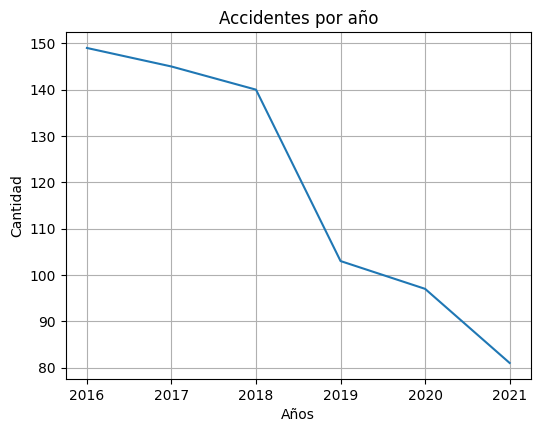

In [39]:
df_accidentes["FECHA"] = pd.to_datetime(df_accidentes["FECHA"])
años = df_accidentes["FECHA"].dt.year

plt.figure(figsize=(6, 4.5))
plt.plot(años.unique(), años.value_counts())
plt.title("Accidentes por año")
plt.xlabel("Años")
plt.ylabel("Cantidad")
plt.grid()
plt.show()

##### Se puede obervar que desde desde el año 2016 hasta el 2021, la cifra de accidentes anuales ha disminuido. Caben dos apreciaciones importantes:
    - El rango comprendido entre 2018 y 2019 tiene la mayor disminución de la cifra de accidentes, desde un aproximado de 140 accidentes a una cifra inferior a los 110 accidentes.
    - El año 2021 cerró con una cifra inferior a los 90 accidentes.

## Accidentalidad por horas.

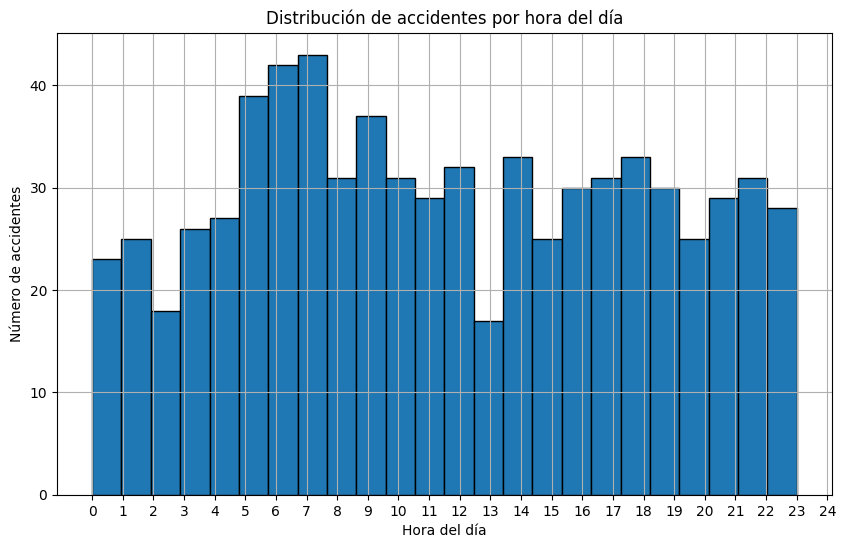

In [40]:
df_accidentes["HORA"] = pd.to_datetime(df_accidentes["HORA"])
horas = df_accidentes["HORA"].dt.hour

plt.figure(figsize=(10, 6))
plt.hist(horas, bins=24, edgecolor="black")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.title("Distribución de accidentes por hora del día")
plt.xticks(range(0, 25))
plt.grid(True, zorder=1)
plt.show()


##### En el anterior histograma graficamos la distribución de accidentes por horas del día, concluímos que:
    - En todos los rangos horarios ocurrieron más de 10 accidentes.
    - En los rangos 02:00 - 03:00 y 12:30 - 13:30 aproximadamente, ocurrieron menos de 20 accidentes, lo que podría representar disminución de tráfico a esas horas. Y en todos los demás rangos ocurrieron más de 20 accidentes.
    - En los rangos 05:00 - 08:00 ocurren la mayor cantidad de accidentes, superando el promedio de 40 accidentes.

## Cantidad de accidentes por tipos de calles.

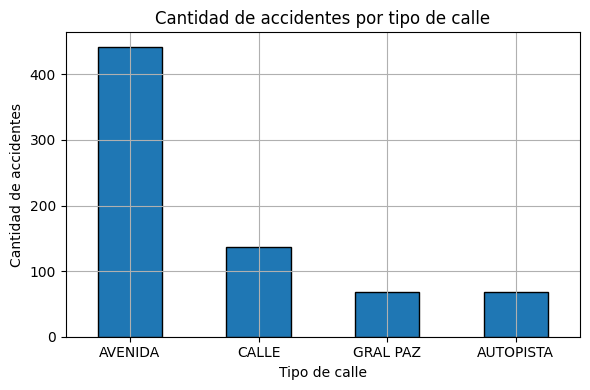

In [41]:
accidentes_por_tipo_calle = df_accidentes["TIPO_DE_CALLE"].value_counts()

plt.figure(figsize=(6, 4))
accidentes_por_tipo_calle.plot(kind="bar", edgecolor="black")
plt.xlabel("Tipo de calle")
plt.ylabel("Cantidad de accidentes")
plt.title("Cantidad de accidentes por tipo de calle")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid()
plt.show()


##### De acuerdo a la información del gráfico, en las avenidas se ha presentado mayor número de accidentes, con gran diferencia al superar los 400 casos; seguidas de las calles, que superan los 100 casos. Las autopistas y la General Paz tienen una cantidad cercana de casos, inferior a 100 casos.
##### Si bien las categorías serían avenidas, calles y autopistas, la General Paz no se incluye en alguna de las tres, dado que no existe un consenso sobre si es avenida o autopista.

## Accidentalidad por comunas.

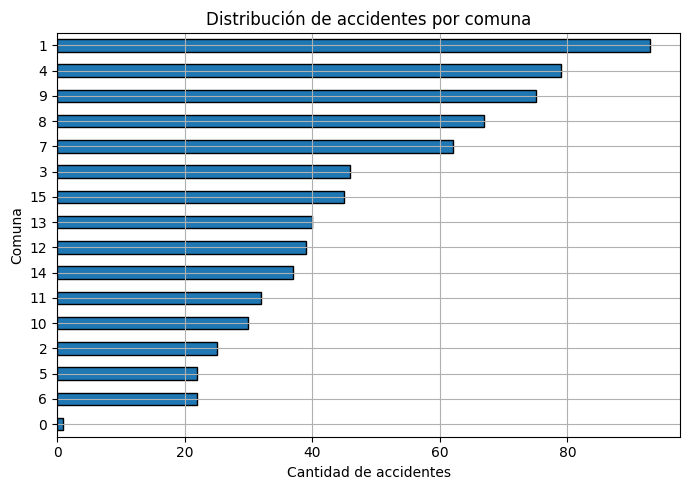

In [42]:
accidentes_por_comuna = df_accidentes["COMUNA"].value_counts()
accidentes_por_comuna = accidentes_por_comuna.sort_values(ascending=True)

plt.figure(figsize=(7, 5))
accidentes_por_comuna.plot(kind="barh", edgecolor="black")
plt.xlabel("Cantidad de accidentes")
plt.ylabel("Comuna")
plt.title("Distribución de accidentes por comuna")
plt.tight_layout()
plt.grid()
plt.show()


##### En el gráfico anterior vemos la distribución de accidentes por comuna, encabezando la lista la comuna 1 con una cifra superior a los 90 accidentes.

## Víctimas y responsables.

##### A continuación veremos dos gráficos que muestran las víctimas por accidente y los responsables de accidente.

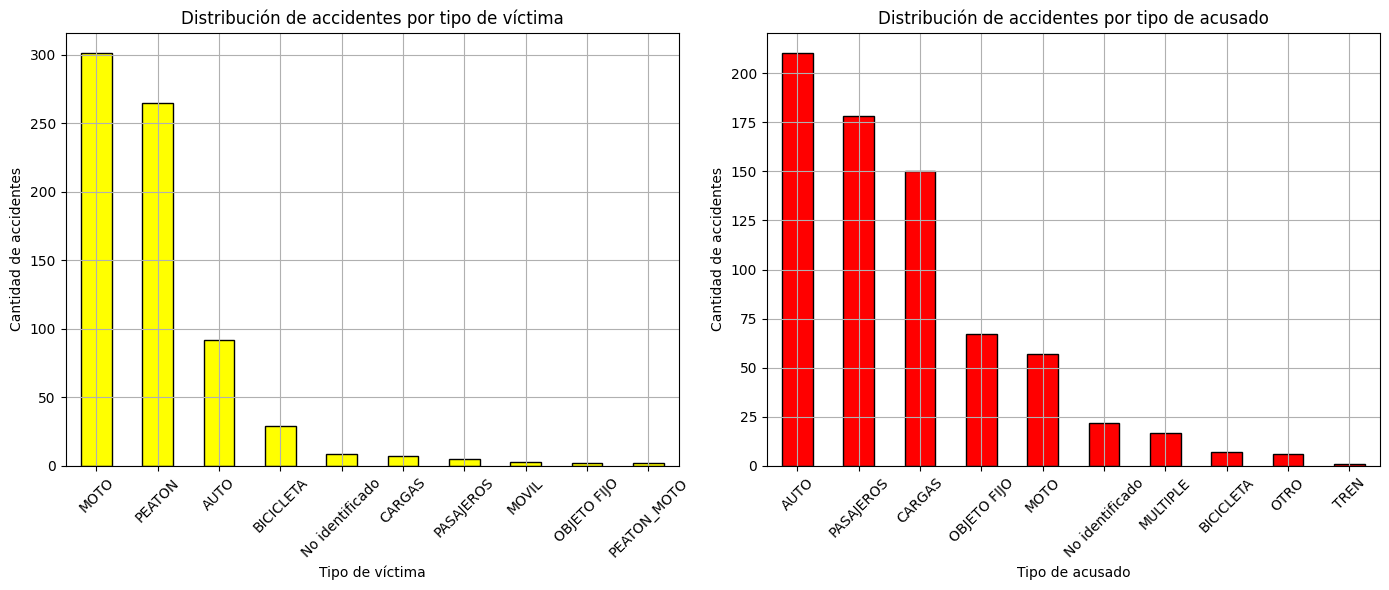

In [43]:
accidentes_por_victima = df_accidentes["VICTIMA_x"].value_counts()
accidentes_por_acusado = df_accidentes["ACUSADO"].value_counts()

# Creamos subgráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Cantidad de víctimas por accidente
accidentes_por_victima.plot(kind="bar", edgecolor="black", color="yellow", ax=axs[0])
axs[0].set_xlabel("Tipo de víctima")
axs[0].set_ylabel("Cantidad de accidentes")
axs[0].set_title("Distribución de accidentes por tipo de víctima")
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid()

# Cantidad de responsables por accidente
accidentes_por_acusado.plot(kind="bar", edgecolor="black", color="red", ax=axs[1])
axs[1].set_xlabel("Tipo de acusado")
axs[1].set_ylabel("Cantidad de accidentes")
axs[1].set_title("Distribución de accidentes por tipo de acusado")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid()

plt.tight_layout()
plt.show()


##### Se pueden derivar las siguientes conclusiones:
    - La mayor cantidad de víctimas en accidentes, alrededor de 300 para todo el conjunto, son ocupantes de motocicletas. Mientras que la mayor cantidad de responsables o acusados de estos accidentes son automóviles.
    - Los peatones son reunen la mayor cantidad de víctimas de accidentes de tráfico, solo superados por las motos.
    - El top 3 de víctimas en accidentes es de motos, peatones y automóviles.
    - El top 3 de responsables o acusados en accidentes es de automóviles, pasajeros y cargas.
    - Solo los automóviles se encuentran en el top 3 de ambas distribuciones.
    - Las bicicletas tienen baja incidencia tanto en el rol de víctimas como de acusados, podría ser considerado un vehiculo seguro.

##### Como dato complementario podemos graficar los 3 roles mayoritarios de víctimas en accidente de tránsito.

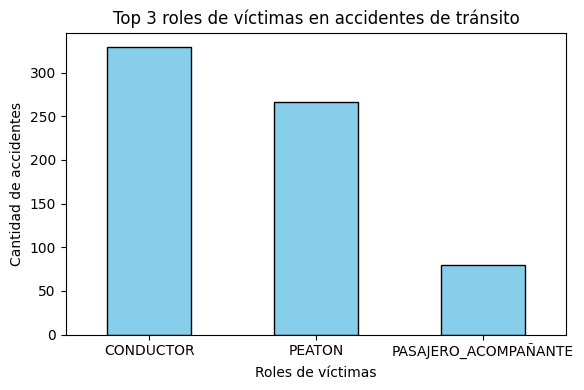

In [44]:
roles_victimas = df_accidentes["ROL"].value_counts()
top_3_roles_victimas = roles_victimas.head(3)

# Graficar el top 3 de roles de víctimas
plt.figure(figsize=(6, 4))
top_3_roles_victimas.plot(kind="bar", edgecolor="black", color="skyblue")
plt.xlabel("Roles de víctimas")
plt.ylabel("Cantidad de accidentes")
plt.title("Top 3 roles de víctimas en accidentes de tránsito")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Conductores, paetones y acompañantes-pasajeros son las víctimas mayoritarias en los accidentes de tránsito.

## Víctimas según sexo.

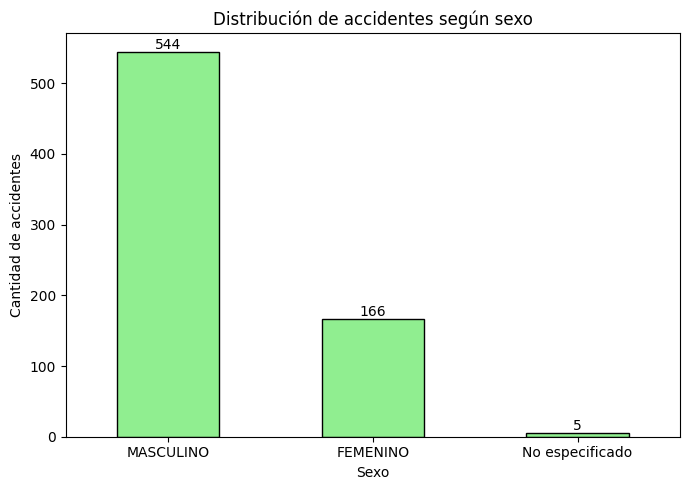

In [45]:
accidentes_por_sexo = df_accidentes["SEXO"].value_counts()

# Graficamos la distribución de accidentes por sexo
plt.figure(figsize=(7, 5))
bars = accidentes_por_sexo.plot(kind="bar", edgecolor="black", color="lightgreen")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de accidentes")
plt.title("Distribución de accidentes según sexo")
plt.xticks(rotation=0)

for index, value in enumerate(accidentes_por_sexo):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### El gráfico muestra una notable disparidad en la cantidad de accidentes registrados entre géneros. Se observa que se reportaron 544 accidentes donde estuvieron involucrados individuos de género masculino, en comparación con 166 accidentes que implicaron individuos de género femenino. Los datos rotulados como "No especificado" obedecen a que el dataset no contaba con un valor del sexo en dicho campo, y decidimos no eliminarlos.

# Conclusiones
##### El Análisis Exploratorio de Datos arroja una panorámica detallada de la accidentalidad vial registrada. Se destaca una distribución heterogénea en el número de víctimas por accidente, siendo mucho más recurrentes los accidentes con una víctima.
##### La cantidad de accidentes por año muestra cierta tendencia a la baja a lo largo del tiempo, lo que puede reflejar optimizaciones en la infraestructura vial, la normativa o la conciencia pública sobre seguridad vial.
##### El análisis por horas revela picos en la accidentalidad en momentos específicos del día, lo que sugiere la necesidad de medidas preventivas y de control durante esas franjas horarias.
##### Los diferentes tipos de calles muestran una variación en la frecuencia de accidentes, lo que podría apuntar a áreas específicas que requieran mejoras en la infraestructura vial y la señalización, específicamente avenidas.
##### La accidentalidad por comunas exhibe disparidades geográficas significativas, señalando áreas específicas que podrían requerir mayor atención en términos de seguridad vial y programas de educación.
##### El análisis de las víctimas y responsables, así como su distribución según el sexo, resalta patrones diferenciales que sugieren posibles disparidades en la exposición y factores de riesgo asociados.
##### Estos resultados brindan una base sólida para orientar estrategias de prevención de accidentes y mejorar la seguridad vial, invitando a investigaciones más detalladas para comprender a fondo los determinantes subyacentes a estas tendencias y ofrecer soluciones más precisas y efectivas en la prevención de accidentes de tránsito.

In [46]:
df_accidentes

,Unnamed: 0,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,0,2016-0001,1,2016-01-01,2023-12-04 04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,1,2016-0002,1,2016-01-02,2023-12-04 01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2,2016-0003,1,2016-01-03,2023-12-04 07:00:00,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,3,2016-0004,1,2016-01-10,2023-12-04 00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,No identificado,CONDUCTOR,MASCULINO,18,2016-01-10 00:00:00
4,4,2016-0005,1,2016-01-21,2023-12-04 05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,712,2021-0093,1,2021-12-13,2023-12-04 17:10:00,AV. RIESTRA Y MOM,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18
711,713,2021-0094,1,2021-12-20,2023-12-04 01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20
712,714,2021-0095,1,2021-12-30,2023-12-04 00:43:00,AV. GAONA Y TERRADA,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02
713,715,2021-0096,1,2021-12-15,2023-12-04 10:30:00,AV. EVA PERON 4071,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20
